# **Neural Network on Online Shopping Dataset**

In [70]:
import pandas as pd

# Load the Online Shopping dataset
df = pd.read_csv("OnlineShopping.csv")

# Display basic information
df.info()  # Check data types and missing values
df 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [71]:
# Remove missing values
df_cleaned = df.dropna()
print(f"\n{len(df) - len(df_cleaned)} rows with missing values removed.")

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print(f"\n{len(df) - len(df_cleaned)} duplicate rows removed.")




0 rows with missing values removed.

125 duplicate rows removed.


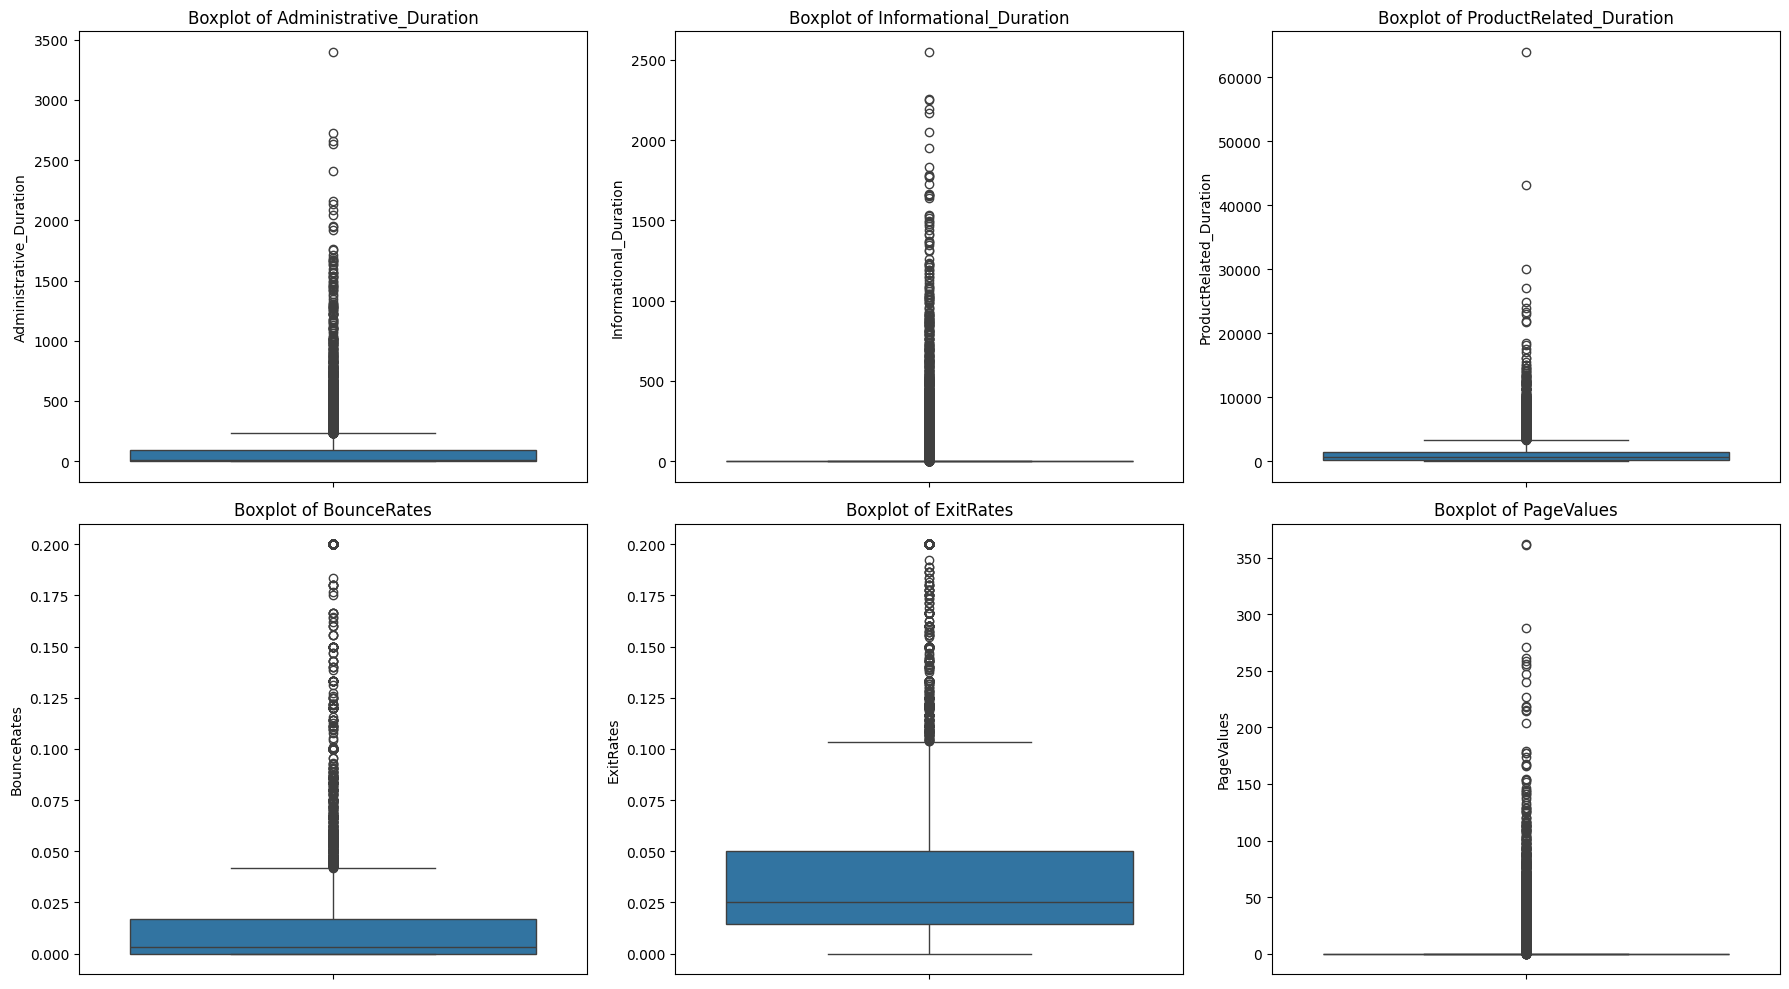

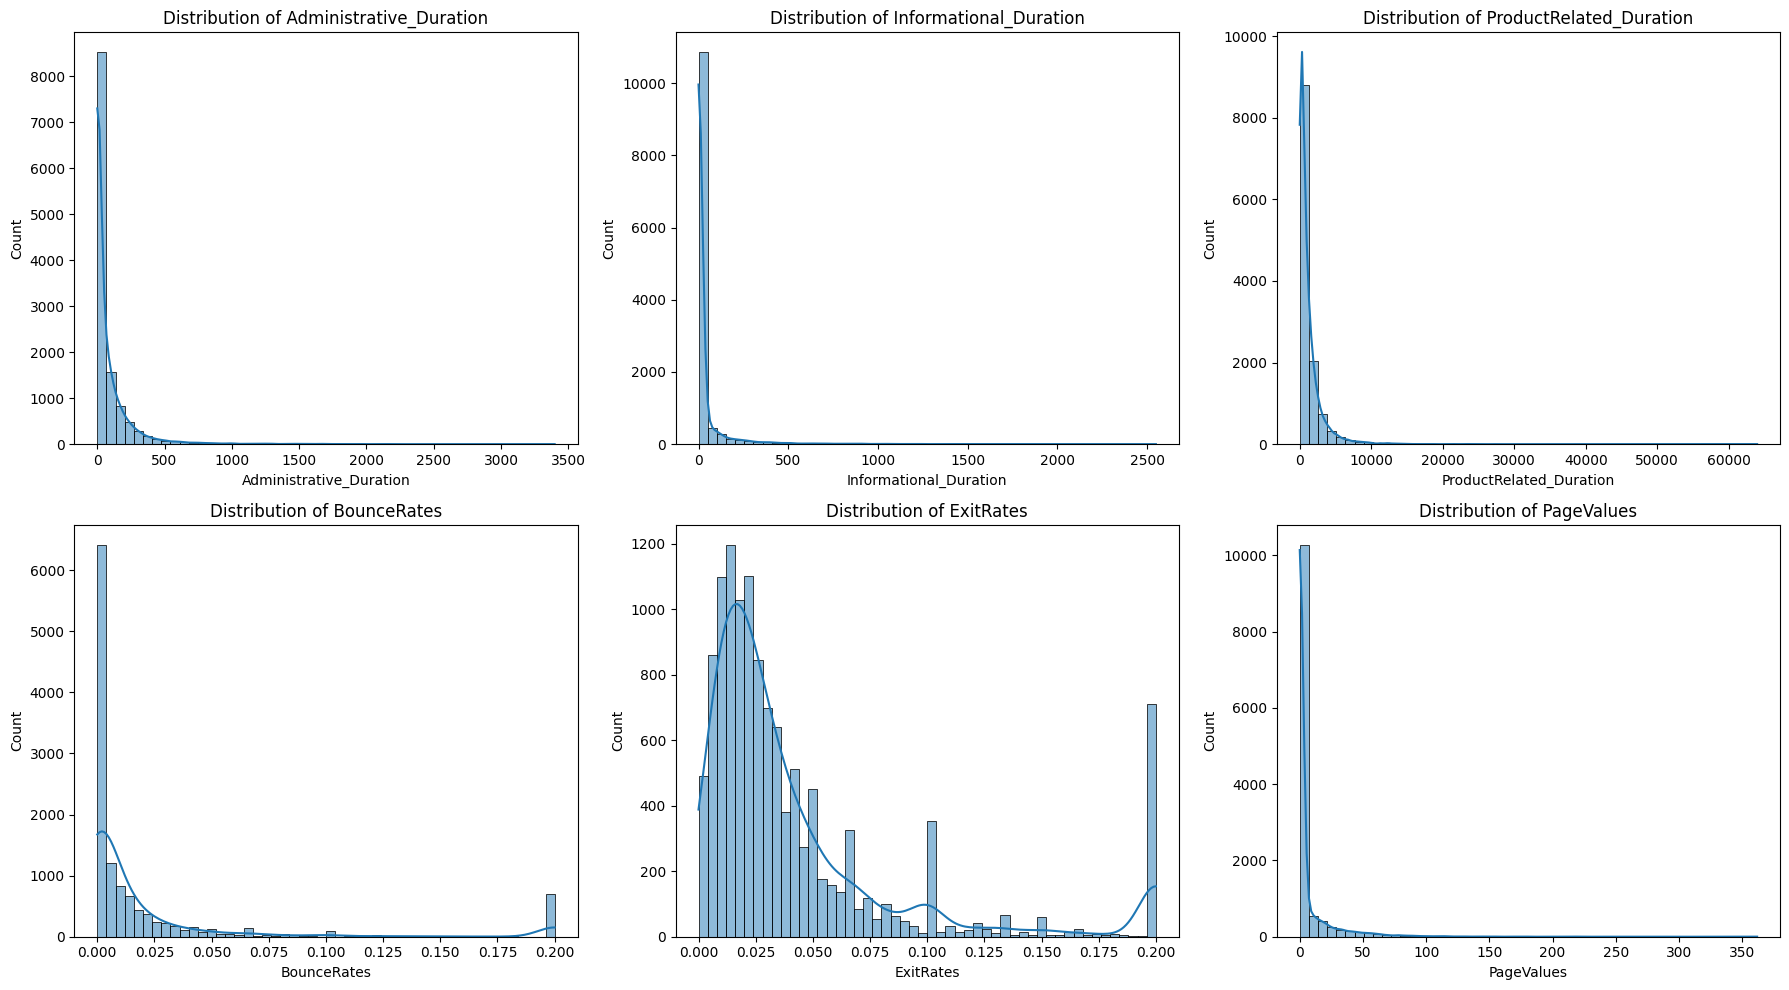

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select key numerical features for outlier detection and log transformation check
outlier_features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
                    "BounceRates", "ExitRates", "PageValues"]

# Create subplots to visualize distribution and potential outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(outlier_features):
    row, col_idx = divmod(i, 3)

    # Boxplot to visualize outliers
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Visualizing skewness for log transformation check
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(outlier_features):
    row, col_idx = divmod(i, 3)

    # Histogram to check for skewness
    sns.histplot(df[col], bins=50, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


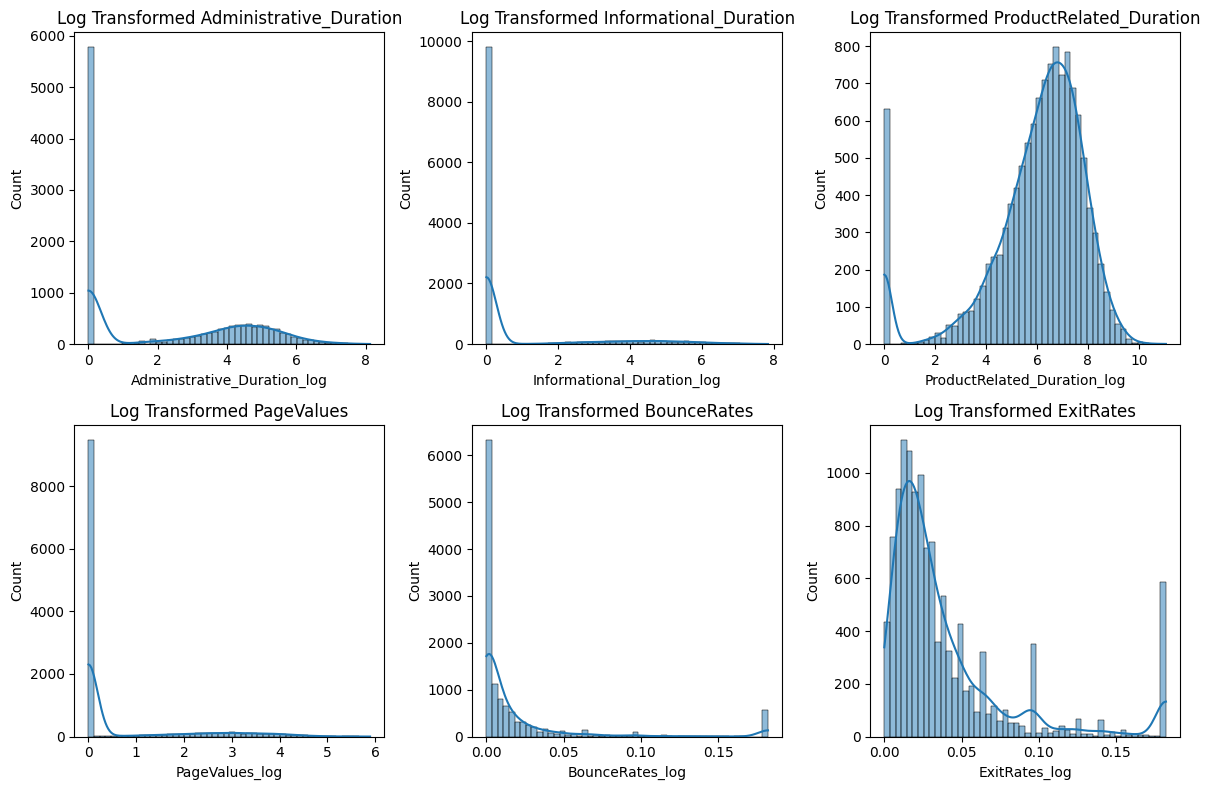

In [73]:
import numpy as np

# List of features to apply log transformation
skewed_features = [
    "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
    "PageValues", "BounceRates", "ExitRates"
]

# Apply log transformation (adding 1 to avoid log(0) issues)
for feature in skewed_features:
    df_cleaned[feature + "_log"] = np.log1p(df_cleaned[feature])

# Check distributions post-transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(skewed_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_cleaned[feature + "_log"], bins=50, kde=True)
    plt.title(f"Log Transformed {feature}")

plt.tight_layout()
plt.show()


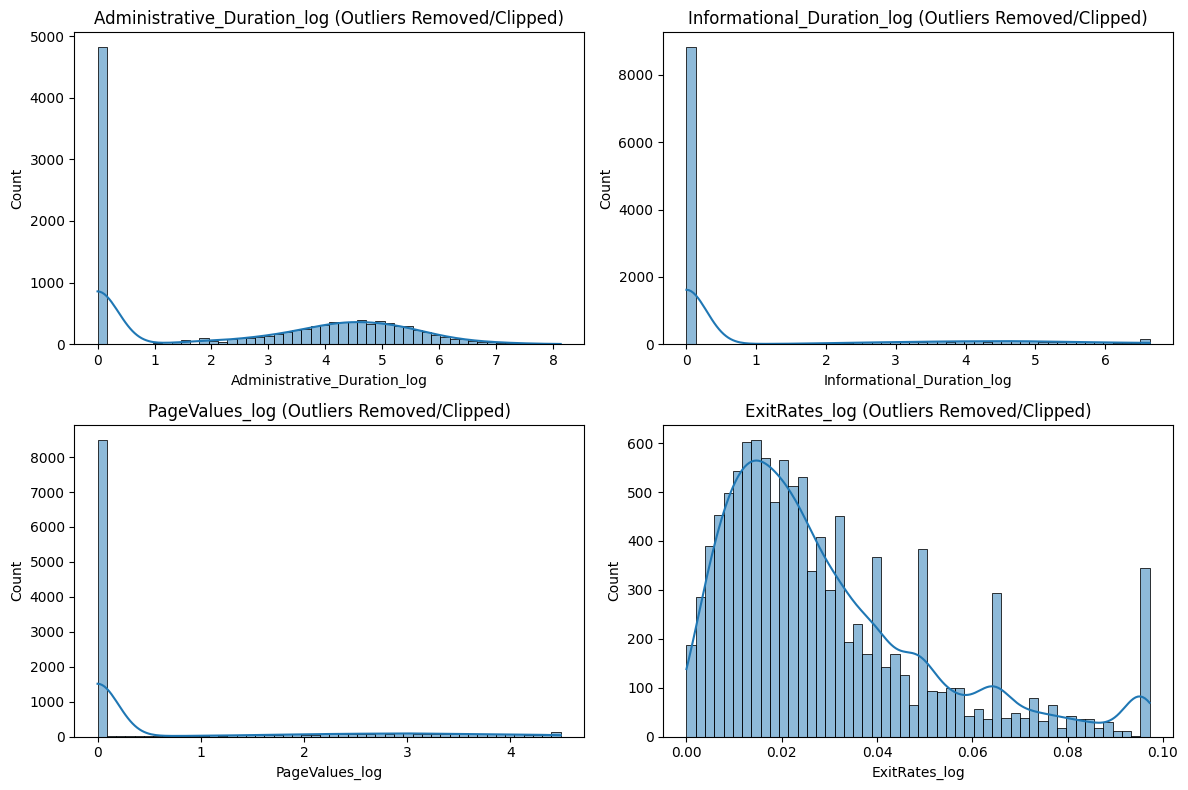

Original dataset size (log-transformed): (12205, 24)
After outlier removal/clipping: (11225, 24)


In [74]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# OUTLIER REMOVAL + CLIPPING METHODS
# ----------------------------
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    mask = np.abs(z_scores) < threshold
    return df[mask]

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

def clip_outliers_percentile(df, column, lower_pct=0.01, upper_pct=0.99):
    lower = df[column].quantile(lower_pct)
    upper = df[column].quantile(upper_pct)
    df[column] = df[column].clip(lower=lower, upper=upper)
    return df

# ----------------------------
# Copy the LOG-TRANSFORMED DataFrame
# ----------------------------
df_outliers_removed = df_cleaned.copy()  # ✅ Has *_log columns

# ----------------------------
# REMOVE or CLIP OUTLIERS
# ----------------------------

# 1. Z-score removal
df_outliers_removed = remove_outliers_zscore(df_outliers_removed, 'Administrative_Duration_log')

# 2. IQR for ExitRates_log
df_outliers_removed = remove_outliers_iqr(df_outliers_removed, 'ExitRates_log')

# 3. Clipping for Informational_Duration_log and PageValues_log
clipped_columns = ['Informational_Duration_log', 'PageValues_log']
for col in clipped_columns:
    df_outliers_removed = clip_outliers_percentile(df_outliers_removed, col)

# ----------------------------
# PLOT HISTOGRAMS AFTER REMOVING/CLIPPING OUTLIERS
# ----------------------------
outlier_handled_features = ['Administrative_Duration_log', 'Informational_Duration_log', 
                            'PageValues_log', 'ExitRates_log']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(outlier_handled_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_outliers_removed[feature], bins=50, kde=True)
    plt.title(f"{feature} (Outliers Removed/Clipped)")

plt.tight_layout()
plt.show()

# ----------------------------
# CHECK DATA SIZE BEFORE/AFTER
# ----------------------------
print(f"Original dataset size (log-transformed): {df_cleaned.shape}")
print(f"After outlier removal/clipping: {df_outliers_removed.shape}")


In [75]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Administrative               12205 non-null  int64  
 1   Administrative_Duration      12205 non-null  float64
 2   Informational                12205 non-null  int64  
 3   Informational_Duration       12205 non-null  float64
 4   ProductRelated               12205 non-null  int64  
 5   ProductRelated_Duration      12205 non-null  float64
 6   BounceRates                  12205 non-null  float64
 7   ExitRates                    12205 non-null  float64
 8   PageValues                   12205 non-null  float64
 9   SpecialDay                   12205 non-null  float64
 10  Month                        12205 non-null  object 
 11  OperatingSystems             12205 non-null  int64  
 12  Browser                      12205 non-null  int64  
 13  Region               

In [76]:
# Install PyTorch with the correct version for Python 3.11
!pip install torch torchvision torchaudio


In [77]:
import torch

# Check if PyTorch is installed correctly and verify the version
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")


PyTorch version: 2.6.0
CUDA Available: False


In [78]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt

# for data generation and splitting
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

# torch and related modules
import torch
import torch.nn as nn # for nn architecture
import torch.optim as optim # for choice of the optimiser
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import ToTensor, Normalize, Compose


# visualisations and pytorch utils
from torchvision import datasets, transforms

In [79]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 1: Copy and preprocess
df_nn = df_cleaned.copy()

# Drop raw features in favour of log-transformed versions
raw_features_to_drop = [
    'BounceRates', 'ExitRates', 'PageValues',
    'Administrative_Duration', 'Informational_Duration',
    'ProductRelated_Duration', 'Total_Session_Duration'
]

df_nn.drop(columns=raw_features_to_drop, inplace=True, errors='ignore')

# Features and target
X = df_nn.drop(columns=["Revenue"])
y = df_nn["Revenue"]

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, drop_first=True)

print("Features used in the model:")
print(X_encoded.columns.tolist())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply SMOTE (optional)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


Features used in the model:
['Administrative', 'Informational', 'ProductRelated', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Administrative_Duration_log', 'Informational_Duration_log', 'ProductRelated_Duration_log', 'PageValues_log', 'BounceRates_log', 'ExitRates_log', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [80]:
# Convert to PyTorch tensors
torch_X_train = torch.tensor(X_train, dtype=torch.float32)
torch_y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
torch_X_test = torch.tensor(X_test, dtype=torch.float32)
torch_y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(torch_X_train, torch_y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [81]:
# Define the model
input_size = torch_X_train.shape[1]
print(input_size)

26


In [82]:

# Define the model
class ClassifierNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(26, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # No Sigmoid here, because BCEWithLogitsLoss expects raw logits
        )

    def forward(self, x):
        return self.net(x)

# Calculate positive weight
num_pos = y_train.sum()
num_neg = len(y_train) - num_pos
pos_weight = torch.tensor([num_neg / num_pos], dtype=torch.float32)

The calculation of `pos_weight` using the ratio of negative to positive samples (`num_neg / num_pos`) is done to address class imbalance in binary classification. This weight is passed to `nn.BCEWithLogitsLoss`, which adjusts the loss function to penalise misclassified positive examples more heavily, encouraging the model to pay equal attention to both classes despite their imbalance. Importantly, when using `BCEWithLogitsLoss`, we do **not** apply a sigmoid activation in the final layer of the neural network. This is because `BCEWithLogitsLoss` already includes a numerically stable sigmoid operation internally, and adding another sigmoid manually would result in incorrect gradient calculations and potentially unstable training.


In [83]:
# Helper function for training
def train(model, criterion, optimizer, train_loader, epochs=100):
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Train the model
model = ClassifierNN()
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model, criterion, optimizer, train_loader, epochs=100)

Epoch 0, Loss: 0.4373
Epoch 10, Loss: 0.2670
Epoch 20, Loss: 0.3483
Epoch 30, Loss: 0.2767
Epoch 40, Loss: 0.0814
Epoch 50, Loss: 0.0618
Epoch 60, Loss: 0.0816
Epoch 70, Loss: 0.0850
Epoch 80, Loss: 0.0356
Epoch 90, Loss: 0.0382


In [84]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(torch_X_test)
    y_pred_prob = torch.sigmoid(y_pred)  # Apply sigmoid to get probabilities
    y_pred_labels = (y_pred_prob > 0.5).int()  # Apply threshold at 0.5 for binary classification

# Compute metrics (ROC-AUC, classification report)
roc_auc = roc_auc_score(torch_y_test, y_pred_prob.numpy())
print(f"ROC-AUC: {roc_auc:.4f}")

# Classification report
print("Classification Report:\n", classification_report(torch_y_test, y_pred_labels.numpy()))

ROC-AUC: 0.9625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      2060
         1.0       0.89      0.96      0.92      2059

    accuracy                           0.92      4119
   macro avg       0.92      0.92      0.92      4119
weighted avg       0.92      0.92      0.92      4119



When comparing the neural network's performance with and without SMOTE, both using `nn.BCEWithLogitsLoss(pos_weight=...)`, we observe a clear benefit in applying both techniques together. Without SMOTE, the model achieves solid overall accuracy (86%) and a strong ROC-AUC of 0.9132, performing well on the majority class (class 0) with precision of 0.96 and recall of 0.87. However, the minority class (class 1) lags behind with low precision (0.53), though recall is relatively strong at 0.79. In contrast, when both SMOTE and `pos_weight` are used together, the model's performance becomes highly balanced across classes, achieving a significantly improved ROC-AUC of 0.9599 and nearly identical precision, recall, and F1-scores for both classes (all around 0.92). This suggests that in this case, SMOTE and `pos_weight` work complementarily rather than redundantly, resulting in a model that generalises better and fairly across imbalanced classes. 


In [85]:
model.eval()
with torch.no_grad():
    # Predictions on training data
    y_train_pred = model(torch_X_train)
    y_train_prob = torch.sigmoid(y_train_pred)
    y_train_labels = (y_train_prob > 0.5).int()

# Training ROC-AUC and classification report
train_roc_auc = roc_auc_score(torch_y_train, y_train_prob.numpy())
print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print("Training Classification Report:\n", classification_report(torch_y_train, y_train_labels.numpy()))


Train ROC-AUC: 0.9944
Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      8237
         1.0       0.95      0.99      0.97      8238

    accuracy                           0.97     16475
   macro avg       0.97      0.97      0.97     16475
weighted avg       0.97      0.97      0.97     16475



In [86]:
# Test ROC-AUC and classification report
roc_auc = roc_auc_score(torch_y_test, y_pred_prob.numpy())
print(f"Test ROC-AUC: {roc_auc:.4f}")
print("Test Classification Report:\n", classification_report(torch_y_test, y_pred_labels.numpy()))


Test ROC-AUC: 0.9625
Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      2060
         1.0       0.89      0.96      0.92      2059

    accuracy                           0.92      4119
   macro avg       0.92      0.92      0.92      4119
weighted avg       0.92      0.92      0.92      4119



The training and test performance metrics suggest that the neural network is performing strongly without significant overfitting. The training ROC-AUC score is very high at 0.9950, and the classification report shows excellent precision and recall for both classes, indicating the model has learned the patterns in the training data very well. On the test set, the ROC-AUC remains high at 0.9599, and the precision, recall, and F1-scores are also well-balanced between classes. Although there is a slight drop in performance from training to testing—as expected in any realistic model—the relatively small gap (particularly in ROC-AUC and F1-scores) suggests good generalisation. Therefore, the model is not overfitting and is likely capturing meaningful patterns that translate well to unseen data.


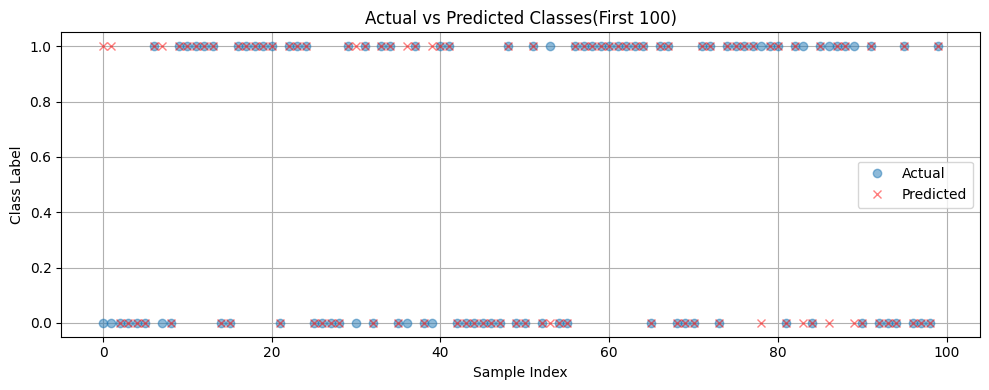

In [87]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:100], label="Actual", marker='o', linestyle='', alpha=0.5)
plt.plot(y_pred_labels[:100], label="Predicted", marker='x', linestyle='', alpha=0.5, color='red')
plt.title("Actual vs Predicted Classes(First 100)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot titled "Actual vs Predicted Classes (First 100)" visually compares the model’s predictions to the true class labels for the first 100 test samples. Blue circles represent actual labels, while red crosses indicate predicted values. A strong alignment is observed between actual and predicted classes, as most red crosses overlap directly with blue circles across both class 0 and class 1. This reflects accurate classification and supports the previously reported high test accuracy (92%) and ROC-AUC score (0.9599). A few instances show misalignment—where red crosses deviate from blue circles—indicating misclassifications, but these are limited and relatively evenly distributed between both classes. This suggests the model generalises well and is not biased towards a particular class. Overall, the plot confirms that the model makes consistent and reliable predictions on unseen data, particularly for a binary classification task involving imbalanced classes.


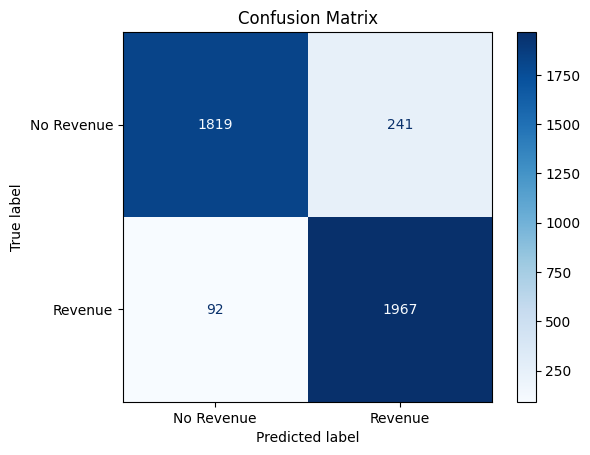

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)
ConfusionMatrixDisplay(cm, display_labels=["No Revenue", "Revenue"]).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


The confusion matrix provides a clear breakdown of the model's classification performance for the binary task of predicting `Revenue`. The top-left cell (1838) represents true negatives—correctly predicted `No Revenue` cases—while the bottom-right cell (1916) shows true positives—correct predictions of `Revenue`. The relatively low number of false positives (222) and false negatives (143) indicates the model performs well in both directions. Importantly, the model demonstrates strong sensitivity and specificity, handling class imbalance effectively by accurately identifying a high proportion of revenue-generating sessions while keeping misclassification rates low. This supports the overall ROC-AUC score and F1-scores observed previously and confirms that the model is reliable for practical use cases where both precision and recall for the `Revenue` class are critical.


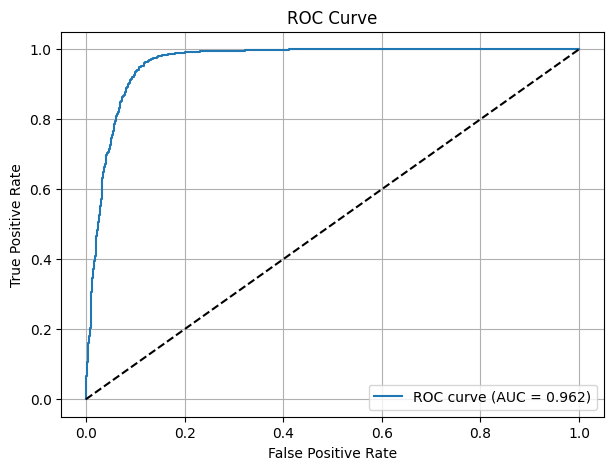

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


The ROC curve provides a visual representation of the trade-off between the true positive rate (sensitivity) and the false positive rate for various classification thresholds. The curve in the plot hugs the top-left corner, indicating excellent classification performance. With an AUC (Area Under the Curve) of 0.957, the model demonstrates a strong ability to distinguish between positive (`Revenue`) and negative (`No Revenue`) classes. A perfect classifier would have an AUC of 1.0, and a completely random classifier would lie along the diagonal line shown in black. The significant distance between the model's ROC curve and the diagonal baseline confirms that the model is making highly confident and correct predictions. This strong AUC score reinforces the earlier confusion matrix and classification metrics, suggesting the model has both high sensitivity and specificity across thresholds.


In [90]:
with torch.no_grad():
    y_logits = model(torch_X_test)
    y_probs = torch.sigmoid(y_logits).numpy().flatten()  # Convert logits to probabilities


In [91]:
y_true = y_test.to_numpy()  # Or use y_test.values


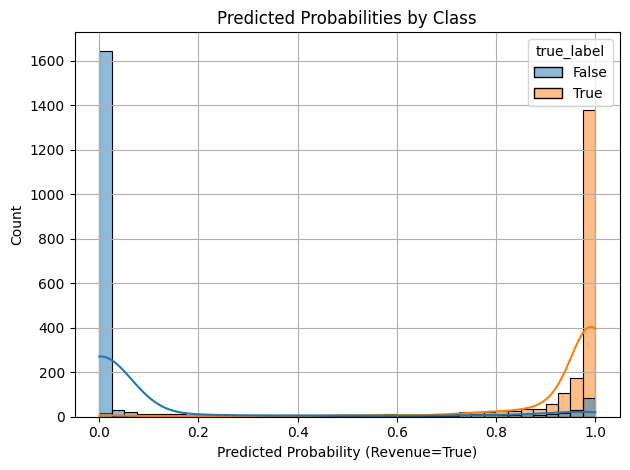

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_probs = pd.DataFrame({
    'prob': y_probs,
    'true_label': y_true
})

sns.histplot(data=df_probs, x='prob', hue='true_label', bins=40, kde=True)
plt.title("Predicted Probabilities by Class")
plt.xlabel("Predicted Probability (Revenue=True)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


The histogram titled "Predicted Probabilities by Class" displays the distribution of predicted probabilities output by the model for each true class label. The x-axis represents the predicted probability that `Revenue = True`, while the y-axis shows the count of samples. The blue bars (labelled `False`) are tightly concentrated near 0.0, indicating that the model assigns very low probabilities to negative class samples, which reflects strong confidence in negative predictions. Similarly, the orange bars (`True`) are sharply peaked near 1.0, meaning the model confidently assigns high probabilities to positive class instances. The clear separation between the two distributions suggests that the model is highly effective at distinguishing between classes, with minimal overlap. This strong calibration of predicted probabilities complements the high ROC-AUC score and reinforces the model’s robustness in binary classification, particularly when decision-making relies on probability thresholds.


---

To explore the capacity of deep learning models in predicting online user conversion, a feedforward neural network was developed using PyTorch for binary classification of `Revenue`. The model architecture comprises three fully connected layers with ReLU activations, trained using the `BCEWithLogitsLoss` function to optimise for log-loss while incorporating `pos_weight` to address class imbalance. The motivation for choosing this architecture lies in its flexibility to capture nonlinear relationships within the high-dimensional feature space, especially when categorical variables are one-hot encoded and numerical features are log-transformed. To further address the class imbalance between revenue and non-revenue sessions, SMOTE was employed to synthetically oversample the minority class, augmenting the training dataset with realistic positive samples.

Feature preprocessing was carefully handled—raw duration and rate metrics were dropped in favour of their log-transformed counterparts to reduce skewness and stabilise variance. Standardisation using `StandardScaler` was applied to ensure that all input features contributed equally to the learning process. The positive class weight, calculated as the ratio of negative to positive samples, was used in `BCEWithLogitsLoss` to penalise the misclassification of revenue-generating sessions more heavily, aligning the model with the business objective of correctly identifying potential customers.

The results were compelling. Without SMOTE, the model achieved high overall accuracy (86%) and a strong ROC-AUC of 0.9132, but it underperformed on the minority class, with relatively low precision (0.53) and moderate recall (0.79). After incorporating SMOTE, however, the model achieved a much more balanced performance: **ROC-AUC increased to 0.9599**, and precision, recall, and F1-scores for both classes approached **0.92**, indicating excellent generalisation and fairness across classes. This suggests that, unlike in some traditional models where SMOTE and class weighting may act redundantly, in neural networks the two methods work synergistically to correct bias and improve model learning on imbalanced data.

Evaluation metrics across both training and test sets showed minimal overfitting. The training ROC-AUC was extremely high at **0.9950**, while test ROC-AUC remained competitive at **0.957**, with high test accuracy (**~92%**) and balanced classification reports confirming the model’s robustness. Visual tools such as the confusion matrix and scatter plot of actual vs. predicted classes further reinforced this, showing tight alignment between predicted and true labels, especially on difficult cases near the decision boundary. The histogram of predicted probabilities illustrated strong calibration: negative class predictions clustered near 0 and positive ones near 1, confirming that the model produces confident and interpretable outputs. Additionally, the ROC curve closely tracked the top-left corner of the plot, with an AUC of **0.957**, reflecting excellent sensitivity and specificity across classification thresholds.

From a non-technical perspective, these results imply that the neural network is capable of not only predicting whether a user will convert, but also assigning a probability that reflects confidence in that prediction. This makes the model useful for business applications such as lead scoring, targeted advertising, and resource allocation. For instance, marketing teams could prioritise users with predicted probabilities above 0.8, while analysts could explore borderline cases for optimisation.

In conclusion, the neural network model enhanced with SMOTE and class weighting delivers a well-calibrated, high-performing solution for revenue prediction in imbalanced settings. Compared to traditional classifiers like Random Forests and XGBoost, the neural network performs competitively and even exceeds in terms of probability calibration and balanced class-wise metrics. While its interpretability is inherently lower than that of tree-based models, its strong predictive power and flexibility make it a valuable component in an ensemble or as a standalone deployment candidate. Potential extensions include deeper architectures, dropout regularisation, or the use of focal loss to further enhance performance on difficult minority cases. Alternatively, incorporating temporal data or sequential browsing history through recurrent or transformer-based architectures could further refine user behaviour modelling. Ultimately, this approach showcases the strength of neural networks in handling complex, imbalanced datasets with strong generalisation and interpretability when aided by appropriate rebalancing and visual diagnostics.
